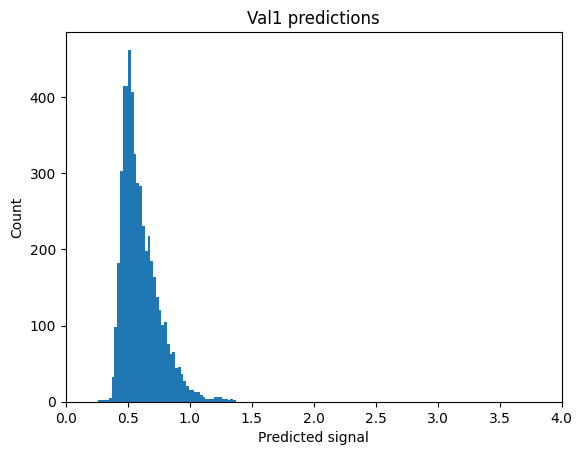

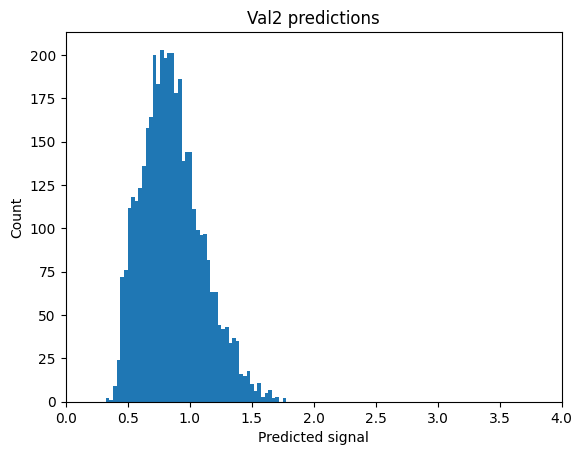

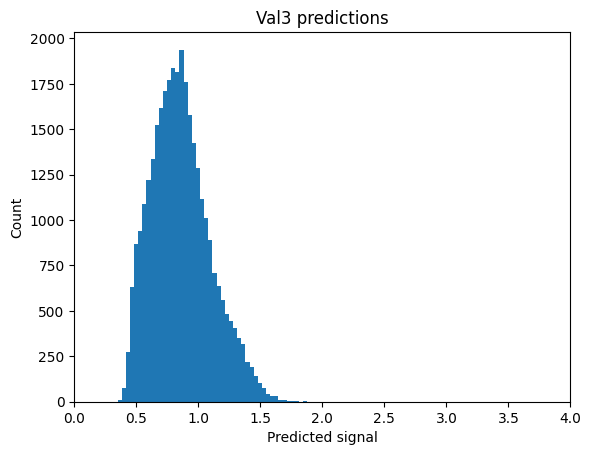

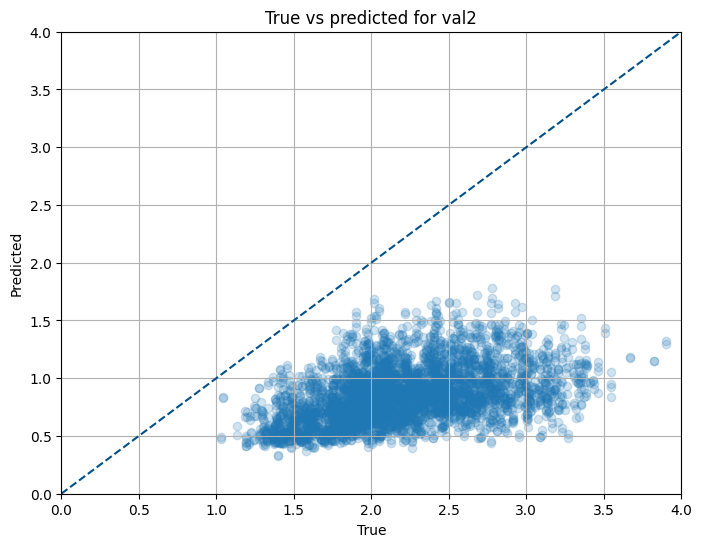

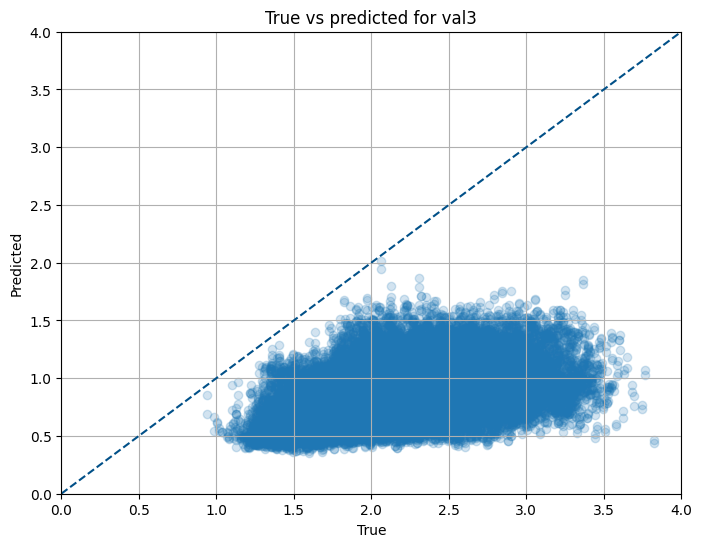

Pearson correlation coefficient for all: 0.4965, p-value: 0
Spearman correlation coefficient for all: 0.5442, p-value: 0
Pearson correlation coefficient for val2: 0.4263, p-value: 8.309e-178
Spearman correlation coefficient for val2: 0.4488, p-value: 3.796e-199
Pearson correlation coefficient for val3: 0.4284, p-value: 0
Spearman correlation coefficient for val3: 0.4468, p-value: 0


In [1]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

# load all the DFs
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/btdaz85g/activations_mouse_VAL_TRAIN.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/regression_liver/data/splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/ladderPos/mouse_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/ladderPos/mouse_liver_TRAINONLY.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_df) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')

def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)

ploth()
plotscatter()
correlate()

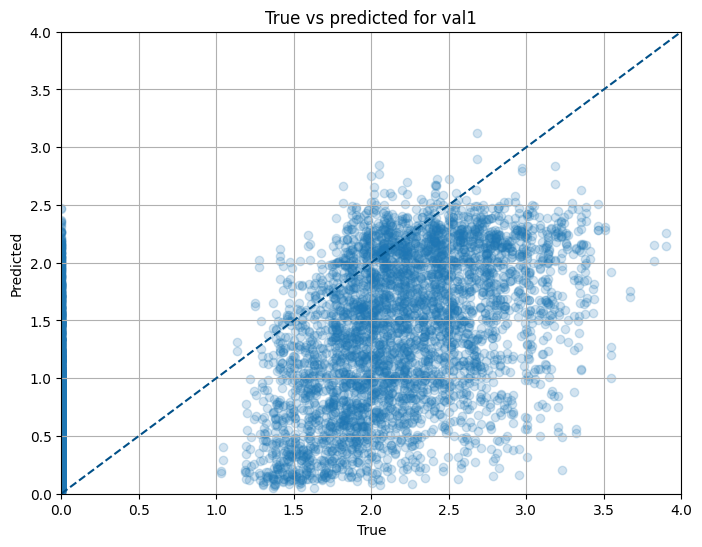

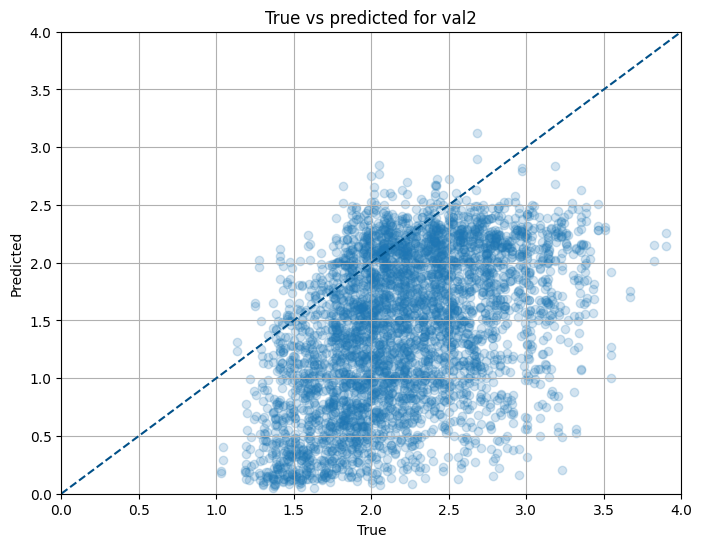

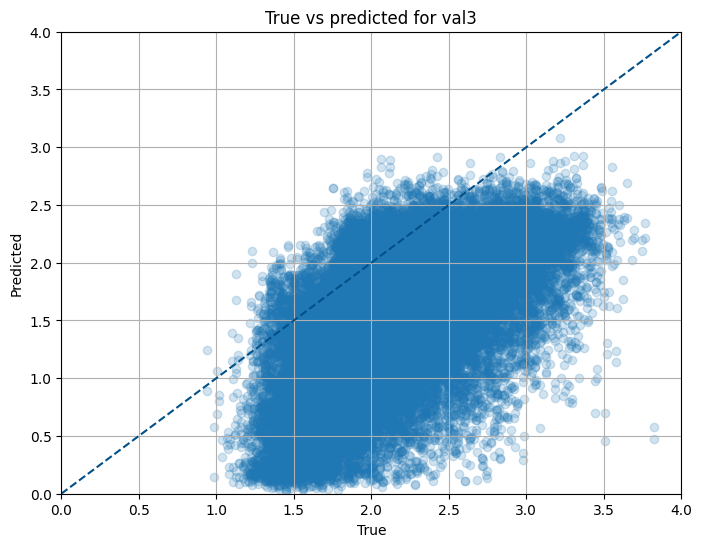

Pearson correlation coefficient for val: 0.6531, p-value: 0
Spearman correlation coefficient for val: 0.6420, p-value: 0
Pearson correlation coefficient for val2: 0.4526, p-value: 6.978e-203
Spearman correlation coefficient for val2: 0.4559, p-value: 3.119e-206
Pearson correlation coefficient for val3: 0.5739, p-value: 0
Spearman correlation coefficient for val3: 0.5742, p-value: 0


In [5]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

# load all the DFs
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/mcf297qb/activations_mouse_VAL_TRAIN.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/regression_liver/data/splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/ladderPos/mouse_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/ladderPos/mouse_liver_TRAINONLY.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_df) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

val_df = pd.concat([doubled_val1_df, doubled_val2_df])
pred_val_df = pd.concat([pred_val1_df, pred_val2_df])

def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def plotscatter():
    scatter(pred_val_df, val_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')

def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_val_df, val_df, 'val')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)

# ploth()
plotscatter()
correlate()

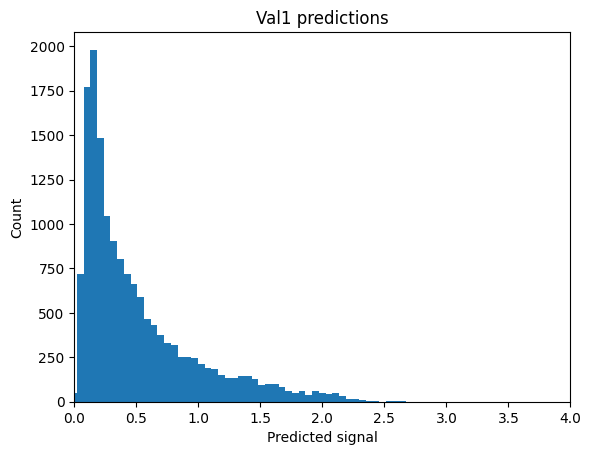

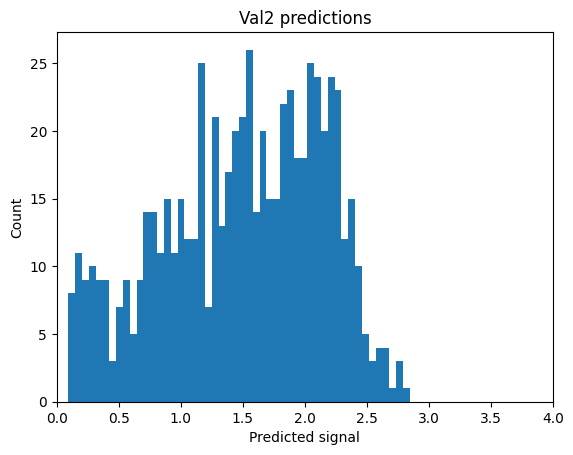

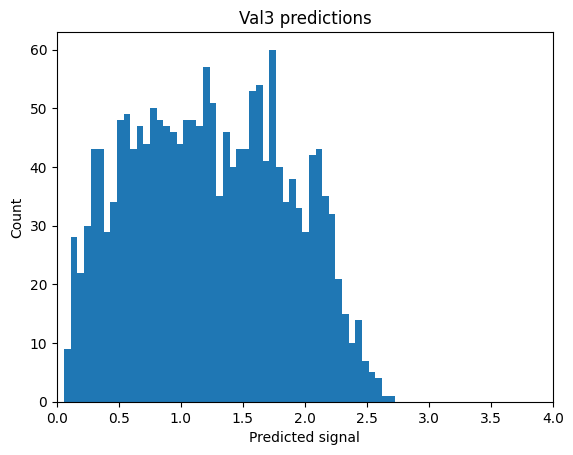

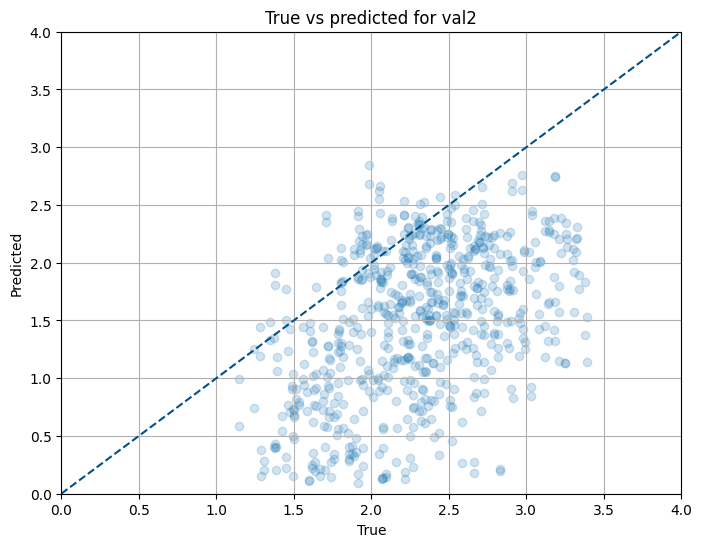

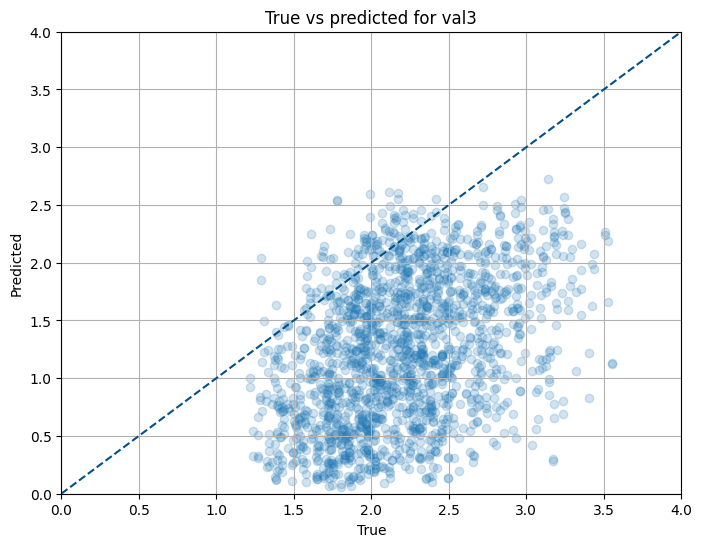

Pearson correlation coefficient for all: 0.5050, p-value: 0
Spearman correlation coefficient for all: 0.4154, p-value: 0
Pearson correlation coefficient for val2: 0.4363, p-value: 3.891e-32
Spearman correlation coefficient for val2: 0.4181, p-value: 2.13e-29
Pearson correlation coefficient for val3: 0.3979, p-value: 2.328e-68
Spearman correlation coefficient for val3: 0.3958, p-value: 1.361e-67


In [1]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

# load all the DFs
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/mcf297qb/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_df) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')

def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)

ploth()
plotscatter()
correlate()

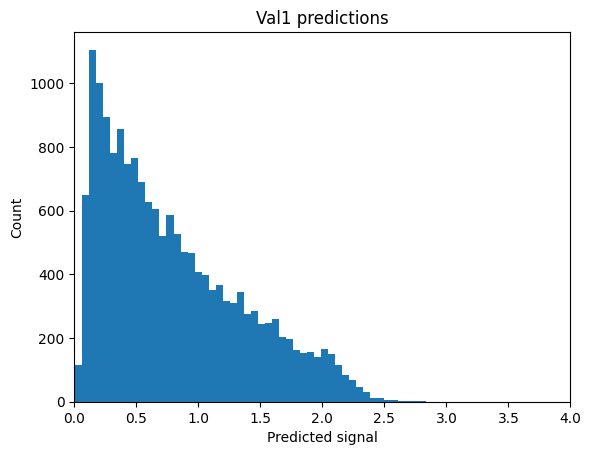

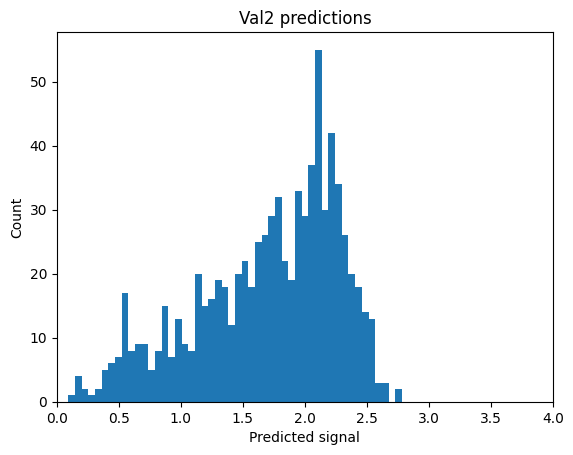

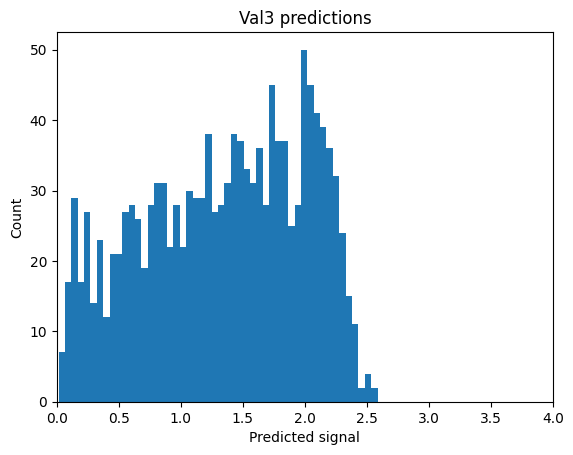

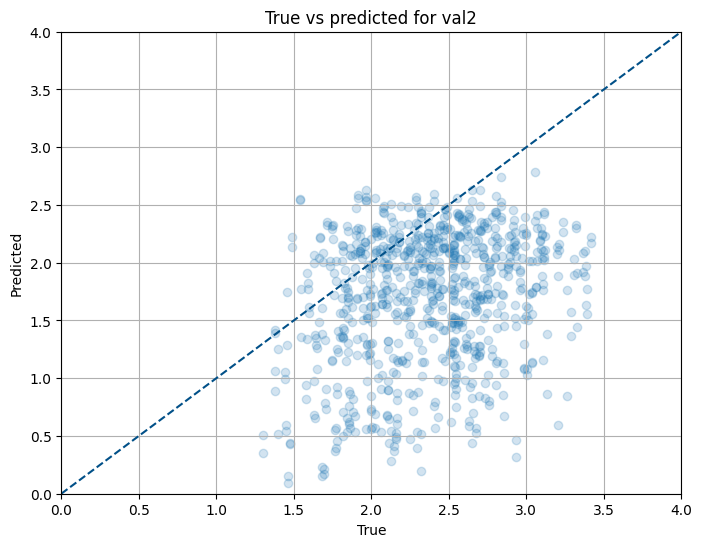

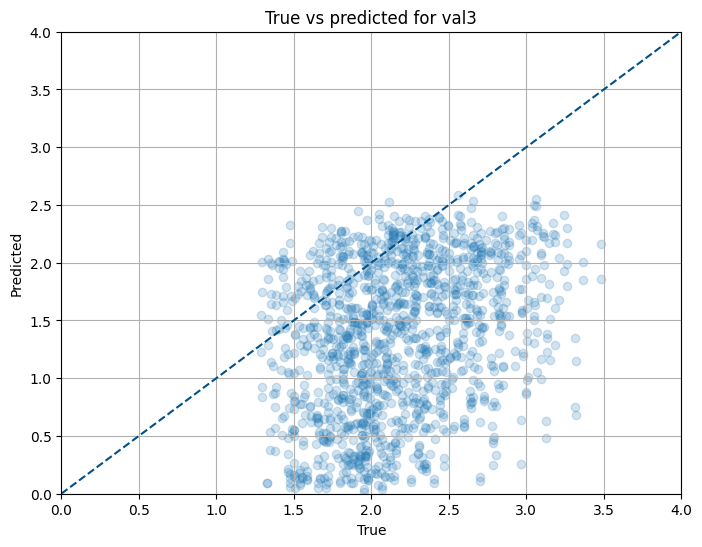

Pearson correlation coefficient for all: 0.3649, p-value: 0
Spearman correlation coefficient for all: 0.3148, p-value: 0
Pearson correlation coefficient for val2: 0.2425, p-value: 2.814e-12
Spearman correlation coefficient for val2: 0.2020, p-value: 6.958e-09
Pearson correlation coefficient for val3: 0.2933, p-value: 5.904e-28
Spearman correlation coefficient for val3: 0.2927, p-value: 7.748e-28


In [4]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

# load all the DFs
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/mcf297qb/activations_rat_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_df) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')

def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)

ploth()
plotscatter()
correlate()

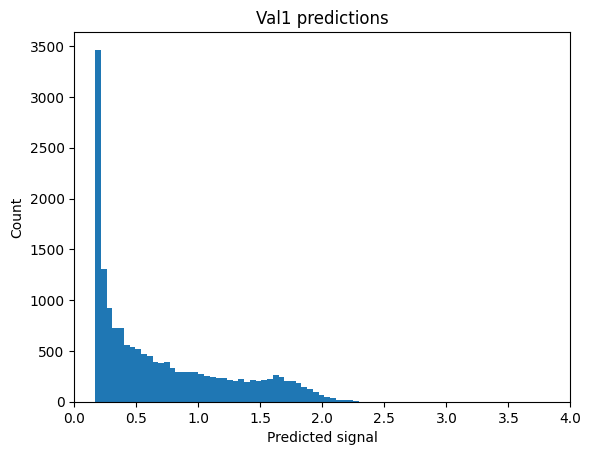

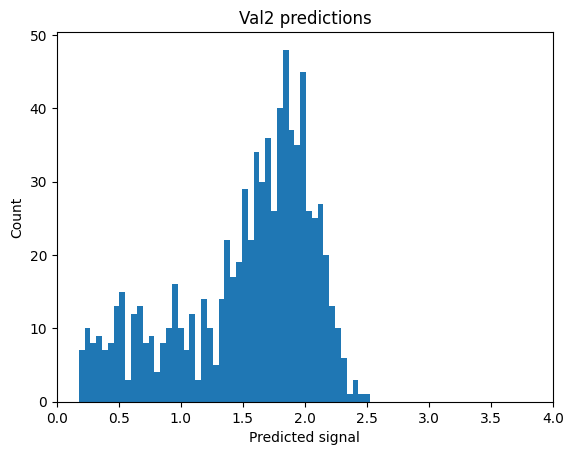

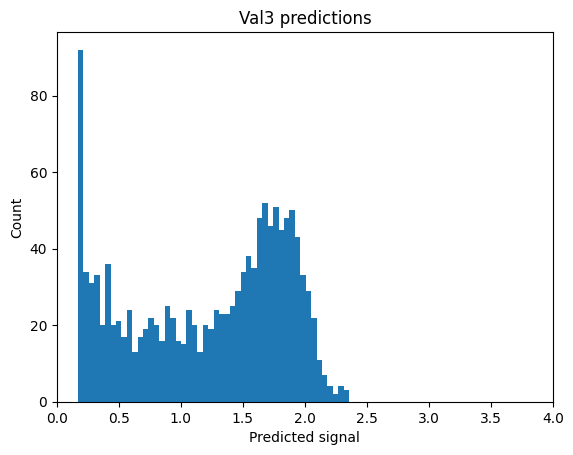

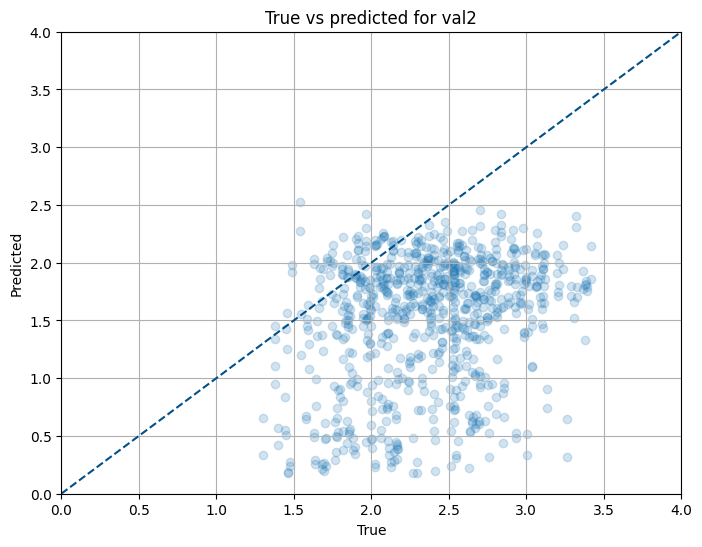

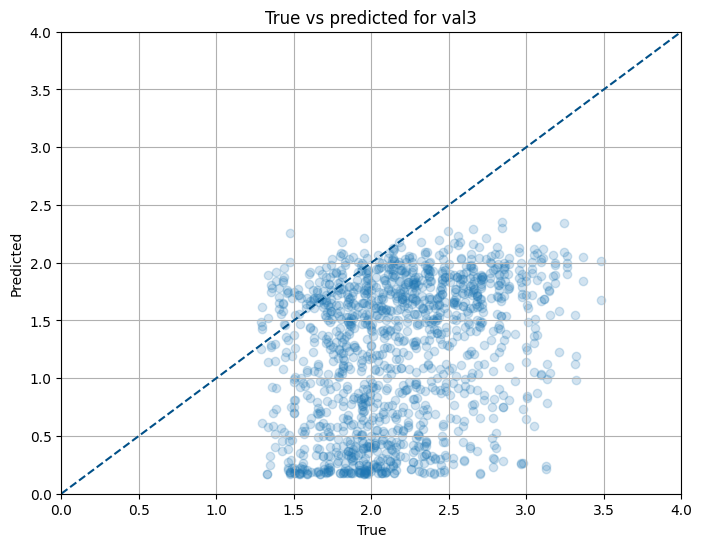

Pearson correlation coefficient for all: 0.3563, p-value: 0
Spearman correlation coefficient for all: 0.3069, p-value: 0
Pearson correlation coefficient for val2: 0.2476, p-value: 9.33e-13
Spearman correlation coefficient for val2: 0.2077, p-value: 2.526e-09
Pearson correlation coefficient for val3: 0.2869, p-value: 9.032e-27
Spearman correlation coefficient for val3: 0.2966, p-value: 1.387e-28


In [5]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

# load all the DFs
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/t733u276/activations_rat_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_df) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')

def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)

ploth()
plotscatter()
correlate()

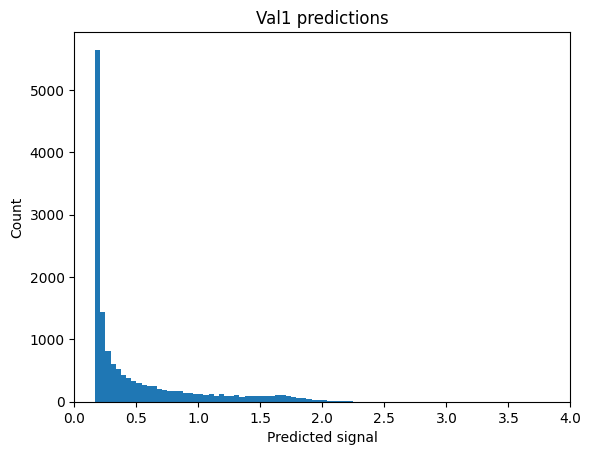

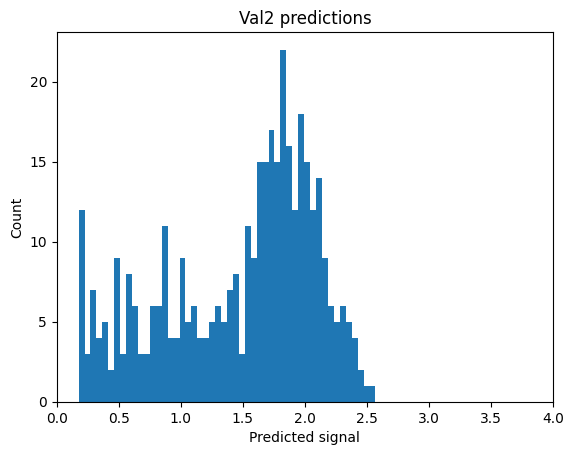

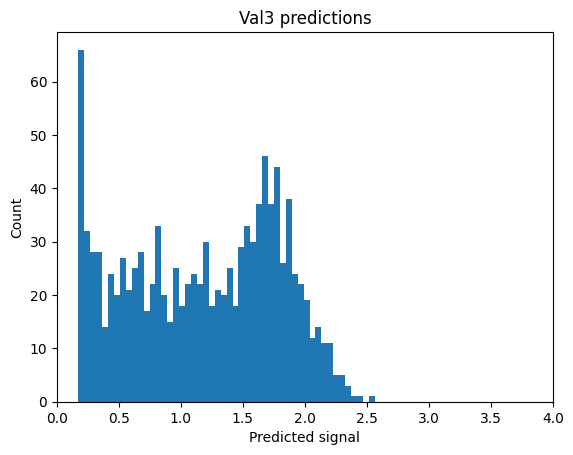

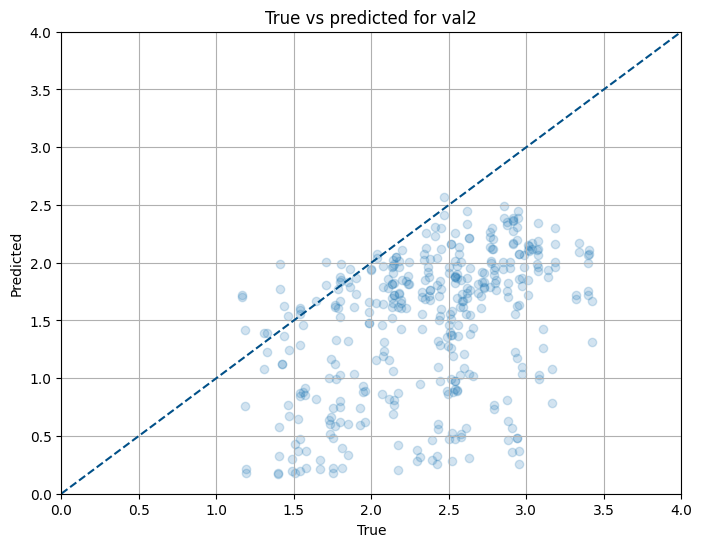

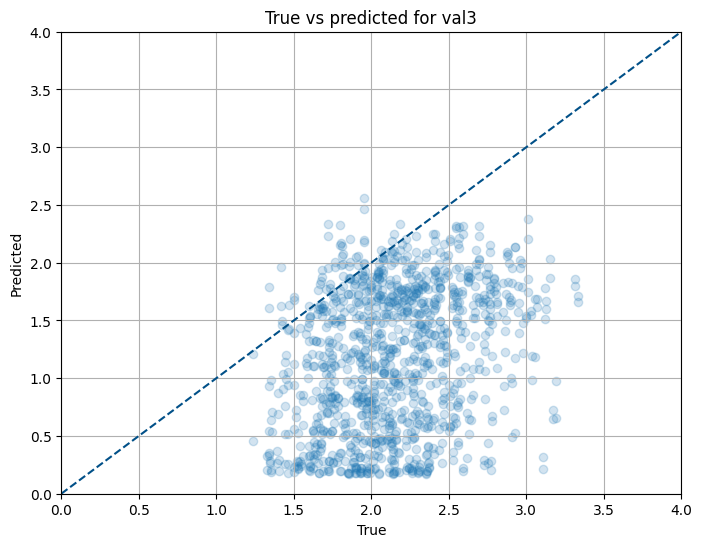

Pearson correlation coefficient for all: 0.4390, p-value: 0
Spearman correlation coefficient for all: 0.3474, p-value: 0
Pearson correlation coefficient for val2: 0.4225, p-value: 3.126e-18
Spearman correlation coefficient for val2: 0.4408, p-value: 7.136e-20
Pearson correlation coefficient for val3: 0.2926, p-value: 2.162e-23
Spearman correlation coefficient for val3: 0.2878, p-value: 1.177e-22


In [6]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

# load all the DFs
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/t733u276/activations_cow_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/cow_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/cow_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/cow_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_df) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')

def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)

ploth()
plotscatter()
correlate()

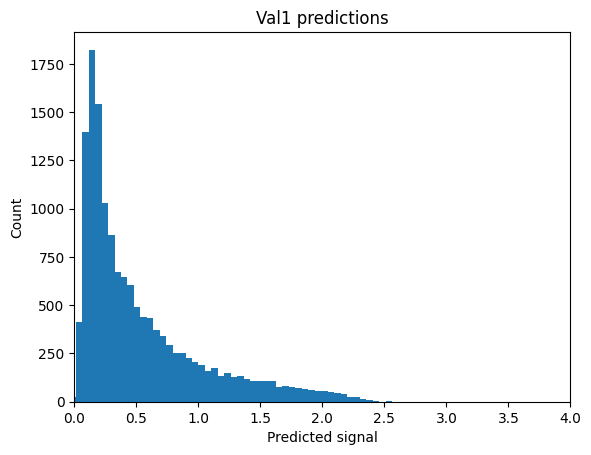

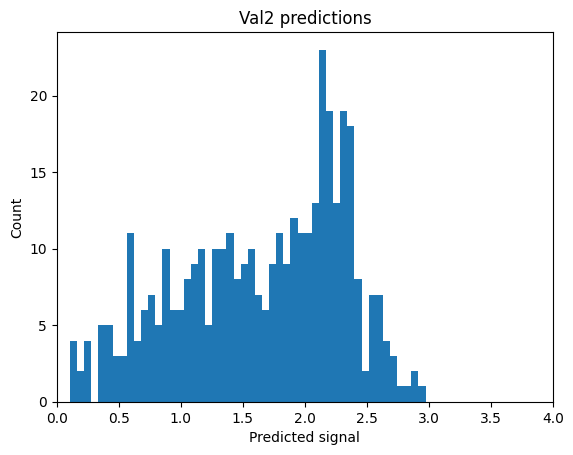

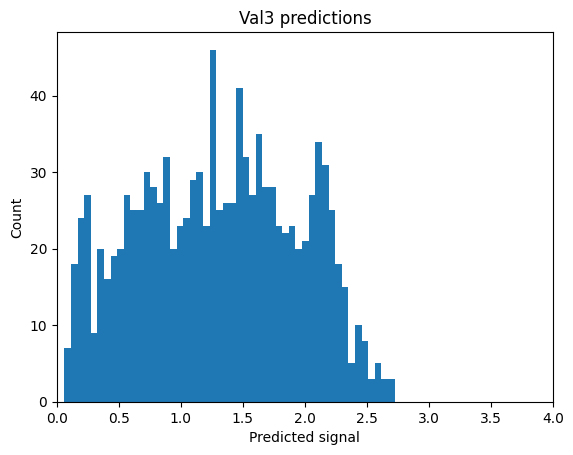

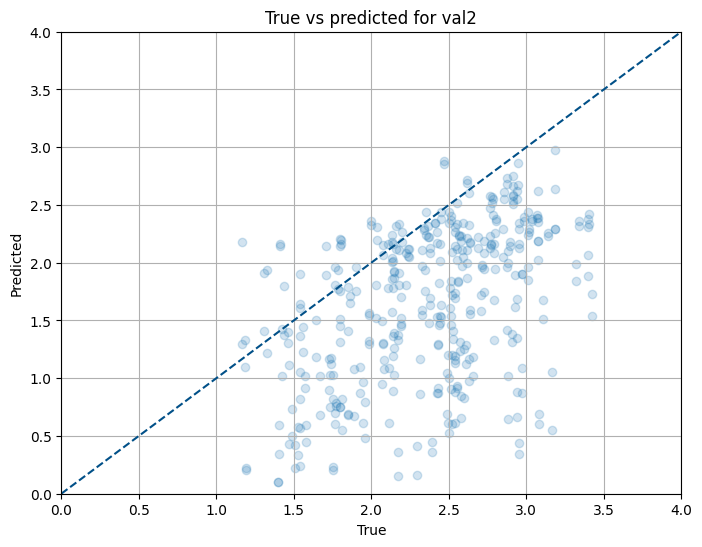

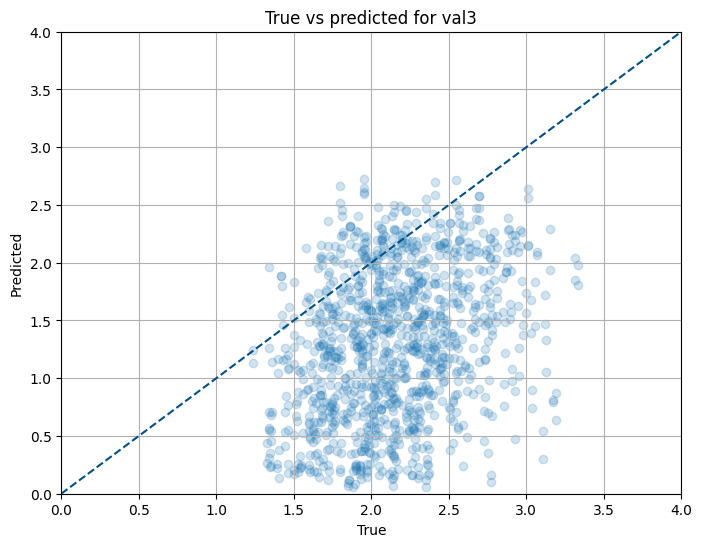

Pearson correlation coefficient for all: 0.4517, p-value: 0
Spearman correlation coefficient for all: 0.3535, p-value: 0
Pearson correlation coefficient for val2: 0.4628, p-value: 5.399e-22
Spearman correlation coefficient for val2: 0.4705, p-value: 9.199e-23
Pearson correlation coefficient for val3: 0.2976, p-value: 3.603e-24
Spearman correlation coefficient for val3: 0.2942, p-value: 1.231e-23


In [7]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

# load all the DFs
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/mcf297qb/activations_cow_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/cow_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/cow_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/cow_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_df) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')

def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)

ploth()
plotscatter()
correlate()

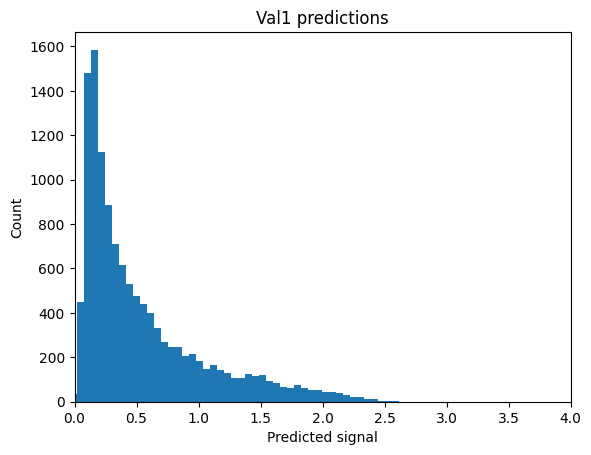

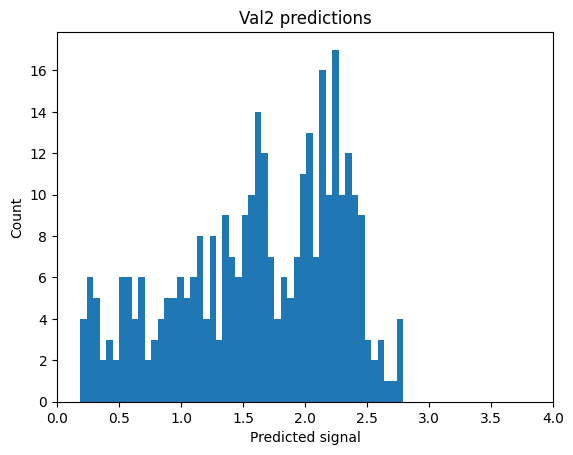

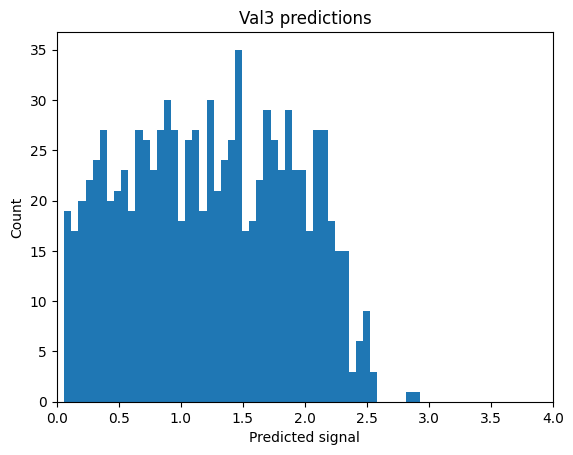

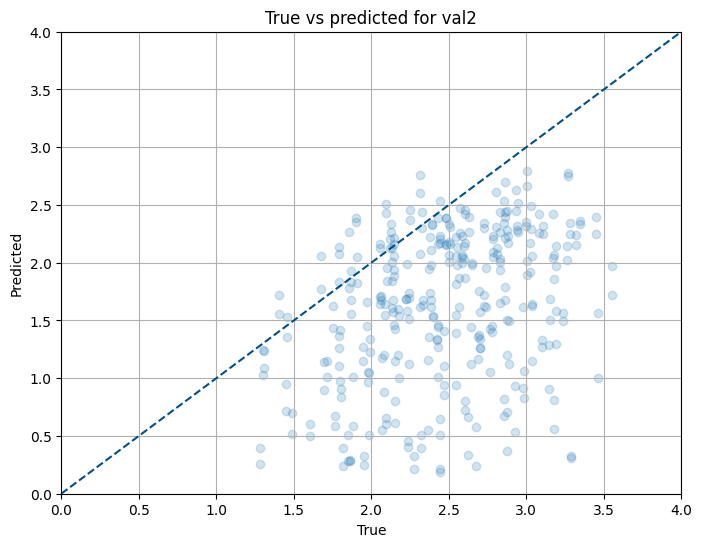

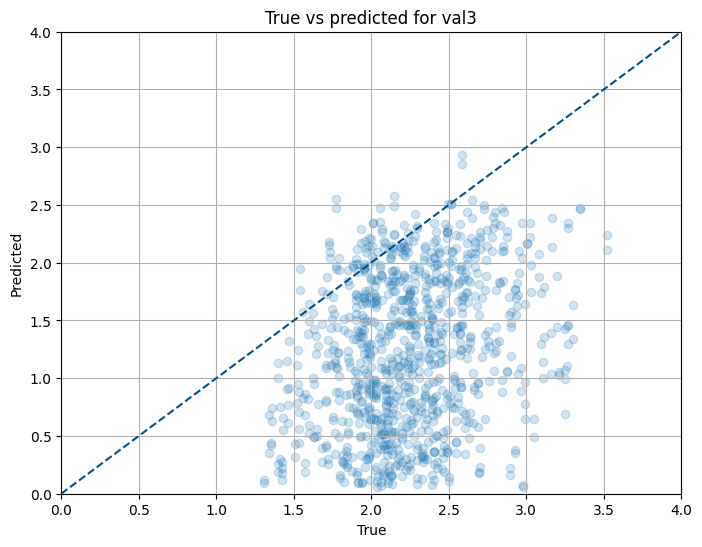

Pearson correlation coefficient for all: 0.4174, p-value: 0
Spearman correlation coefficient for all: 0.3322, p-value: 0
Pearson correlation coefficient for val2: 0.3354, p-value: 4.596e-10
Spearman correlation coefficient for val2: 0.3325, p-value: 6.584e-10
Pearson correlation coefficient for val3: 0.2766, p-value: 3.781e-18
Spearman correlation coefficient for val3: 0.2603, p-value: 3.527e-16


In [8]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

# load all the DFs
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/mcf297qb/activations_pig_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/pig_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/pig_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/pig_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_df) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')

def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)

ploth()
plotscatter()
correlate()

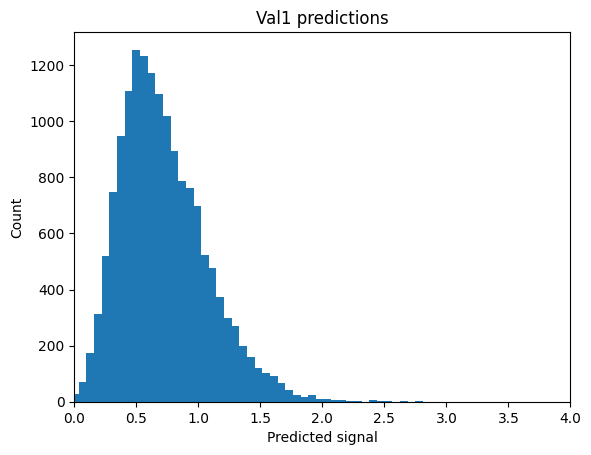

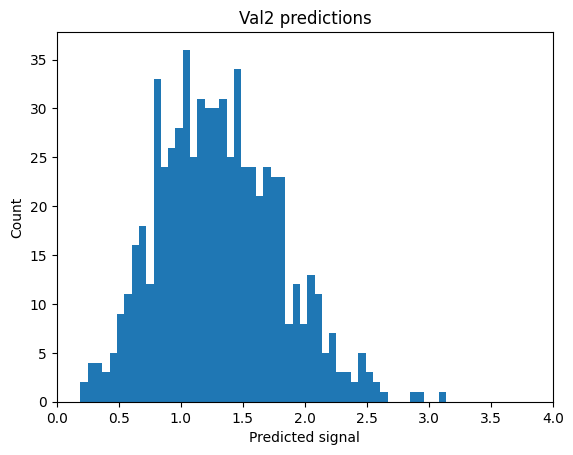

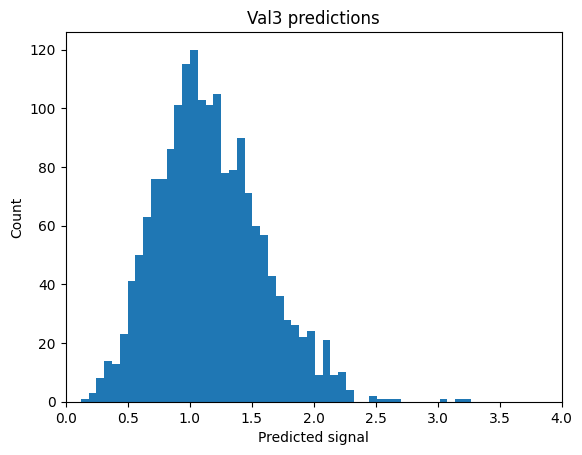

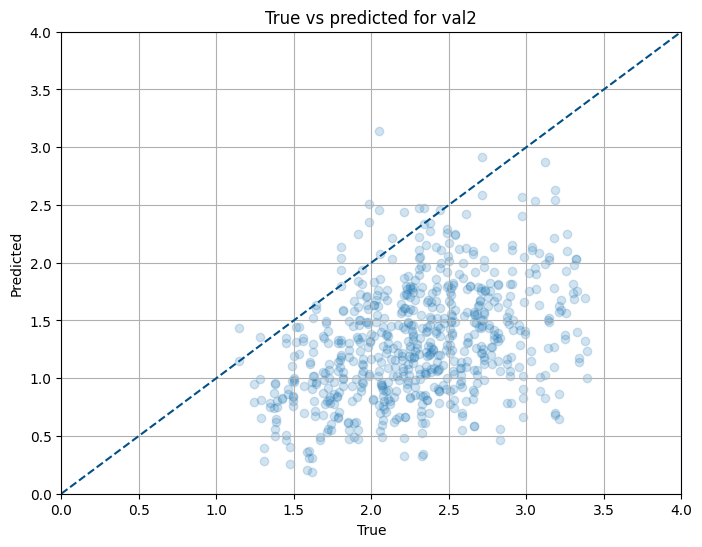

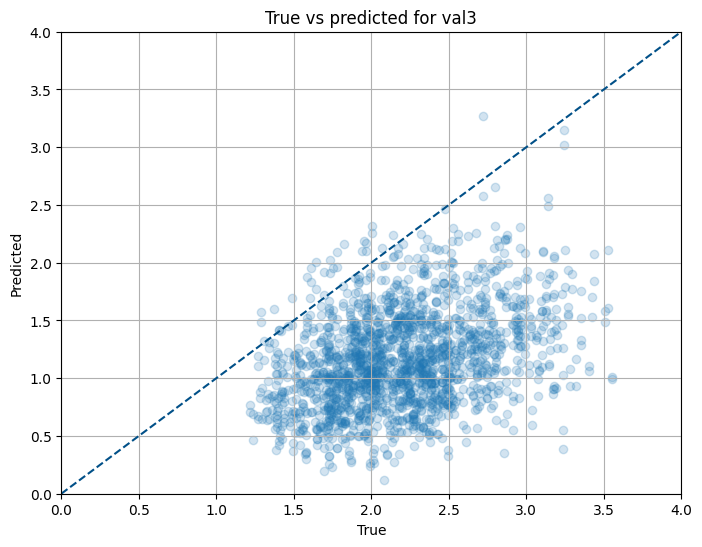

Pearson correlation coefficient for all: 0.4349, p-value: 0
Spearman correlation coefficient for all: 0.3738, p-value: 0
Pearson correlation coefficient for val2: 0.3938, p-value: 5.519e-26
Spearman correlation coefficient for val2: 0.3959, p-value: 2.889e-26
Pearson correlation coefficient for val3: 0.3633, p-value: 1.717e-56
Spearman correlation coefficient for val3: 0.3499, p-value: 3.113e-52


In [4]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

# load all the DFs
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/pu179ter/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_df) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')

def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)

ploth()
plotscatter()
correlate()

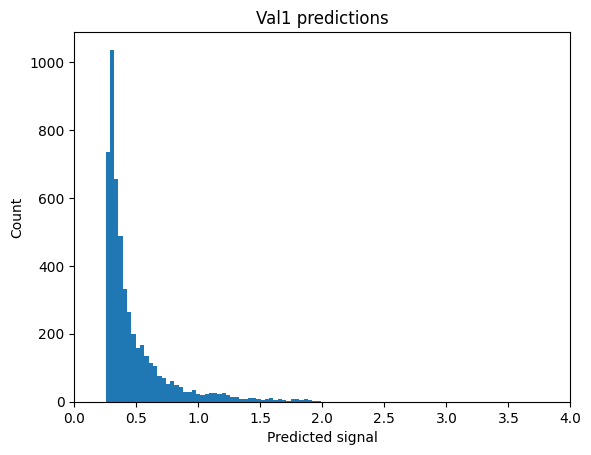

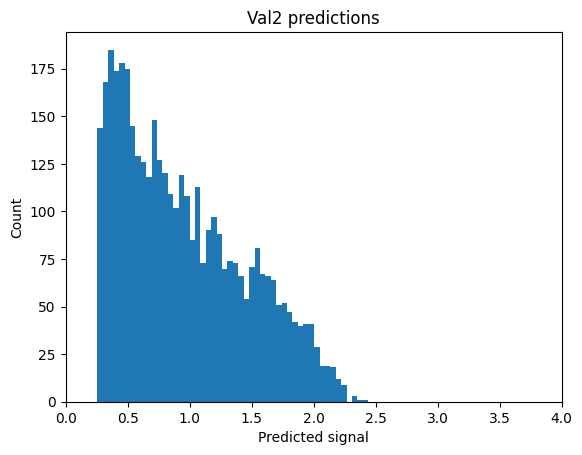

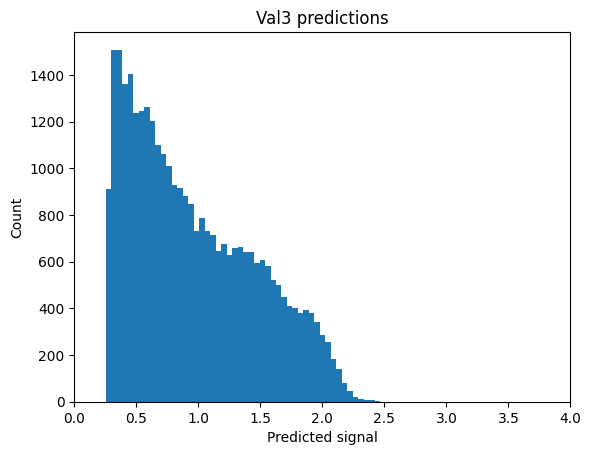

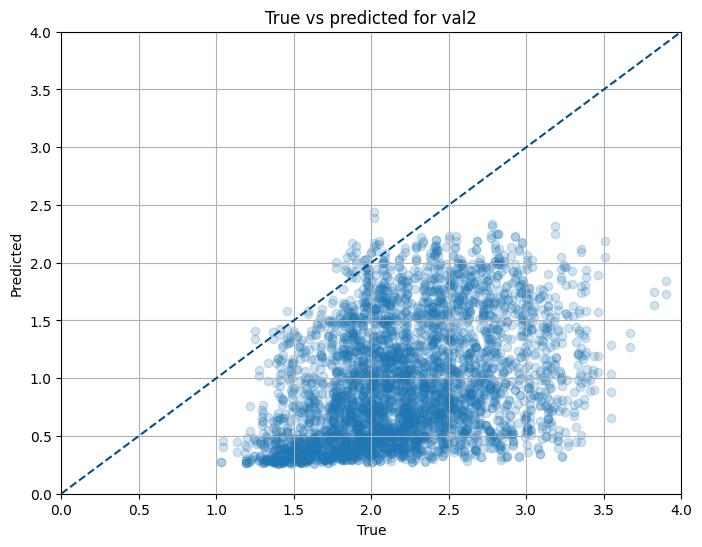

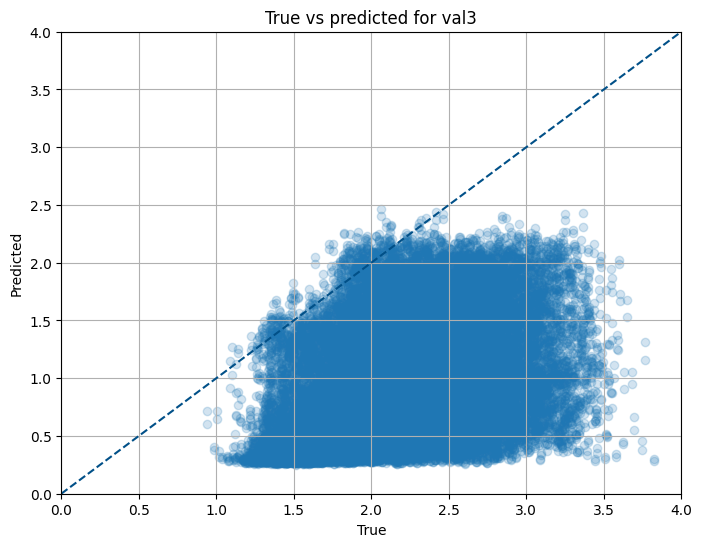

Pearson correlation coefficient for all: 0.4468, p-value: 0
Spearman correlation coefficient for all: 0.5077, p-value: 0
Pearson correlation coefficient for val2: 0.3770, p-value: 2.233e-136
Spearman correlation coefficient for val2: 0.4052, p-value: 3.512e-159
Pearson correlation coefficient for val3: 0.3693, p-value: 0
Spearman correlation coefficient for val3: 0.3992, p-value: 0


In [10]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

# load all the DFs
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/708jmn31/activations_mouse_VAL_TRAIN.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/regression_liver/data/splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/ladderPos/mouse_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/ladderPos/mouse_liver_TRAINONLY.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_df) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')

def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)

ploth()
plotscatter()
correlate()

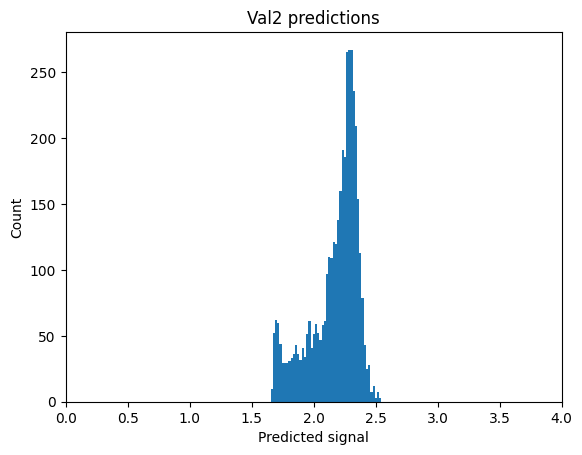

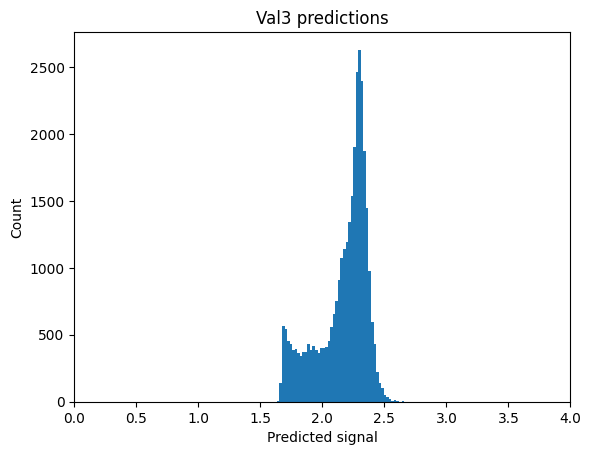

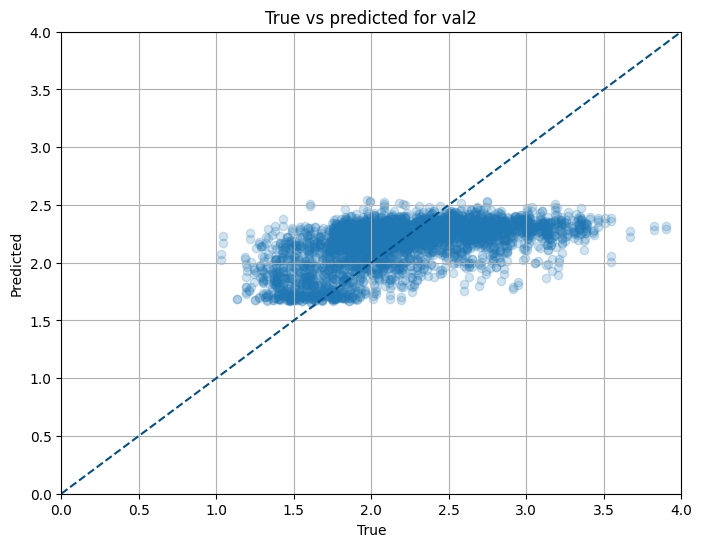

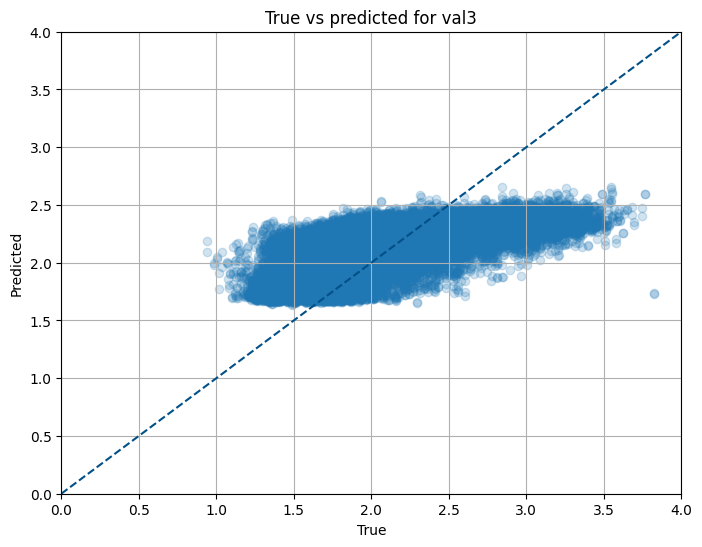

Pearson correlation coefficient for all: 0.6447, p-value: 0
Spearman correlation coefficient for all: 0.6479, p-value: 0
Pearson correlation coefficient for val2: 0.5455, p-value: 1.714e-311
Spearman correlation coefficient for val2: 0.5485, p-value: 1.283e-315
Pearson correlation coefficient for val3: 0.6569, p-value: 0
Spearman correlation coefficient for val3: 0.6599, p-value: 0


In [9]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

# load all the DFs
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/648d5pje/activations_mouse_VAL_TRAIN.csv', header=None)
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/ladderPos/mouse_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/ladderPos/mouse_liver_TRAINONLY.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_df) != val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val2_df = pred_df.head(val2_len)
pred_val3_df = pred_df.tail(val3_len)

doubled_combined = pd.concat([doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')

def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def ploth():
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
# def wilcox():
#     wilcoxon(pred_val1_df, pred_val2_df)
#     wilcoxon(pred_val1_df, pred_val3_df)

ploth()
plotscatter()
correlate()

ERROR: predictions are a different length than validation sets


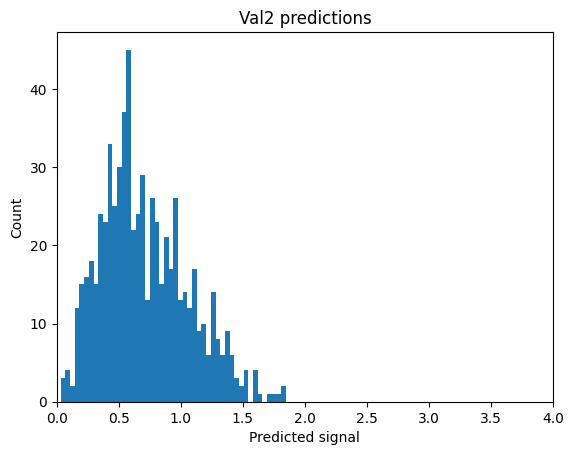

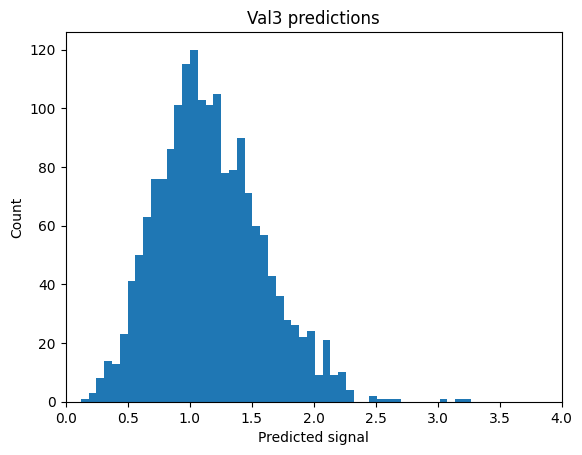

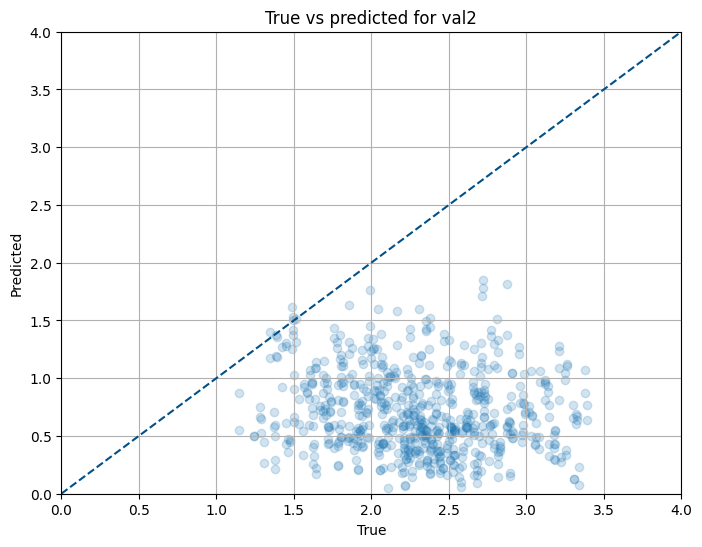

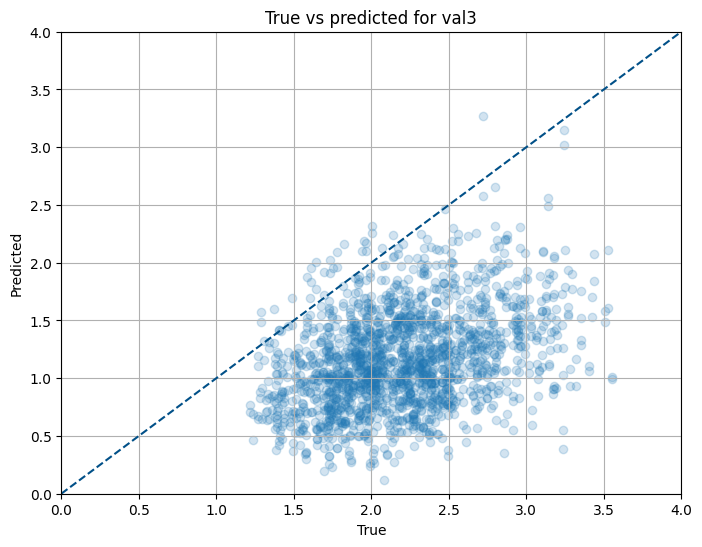

ValueError: x and y must have the same length.

In [3]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species = 'macaque'
model = 'pu179ter'

# load all the DFs
pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_VAL.csv', header=None)
val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_df) != val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val2_df = pred_df.head(val2_len)
pred_val3_df = pred_df.tail(val3_len)

doubled_combined = pd.concat([doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')

def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def ploth():
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
# def wilcox():
#     wilcoxon(pred_val1_df, pred_val2_df)
#     wilcoxon(pred_val1_df, pred_val3_df)

ploth()
plotscatter()
correlate()